In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('game data - game data.csv')

In [24]:
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [25]:
df = df.drop('Days', axis = 1)

In [26]:
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [27]:
x = df.drop('Wear Jacket?', axis=1)
y = df[['Wear Jacket?']]

In [28]:
x.head()

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor


In [29]:
y.head()

,Wear Jacket?
0,No
1,Yes
2,No
3,Yes
4,Yes


# Preprocessing

In [30]:
from pandas.core.dtypes.common import is_numeric_dtype

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
x.columns

Index(['Outlook', 'Temprature', 'Routine'], dtype='object')

In [33]:
le =  LabelEncoder() 

In [34]:
for column in x.columns:
    if is_numeric_dtype(x[column]):
        continue
    else:
        x[column] =le.fit_transform(x[column])

In [35]:
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


In [36]:
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


# encoding value
Outlook (Sunny-> 1, Cloudy->0)<br> 
Temperature (Warm-> 1, Cold-> 0) <br>
Routine (Outdoor->1, Indoor-> 0)

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
clf = DecisionTreeClassifier() # object identify

In [39]:
clf.fit(x, y)

DecisionTreeClassifier()

In [42]:
clf.predict([[0, 1, 0]]) # cloudy, warm, indoor

array(['No'], dtype=object)

In [43]:
clf.predict([[1, 0, 0]]) # sunny, cold, indoor

array(['No'], dtype=object)

[Text(0.6666666666666666, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.375, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

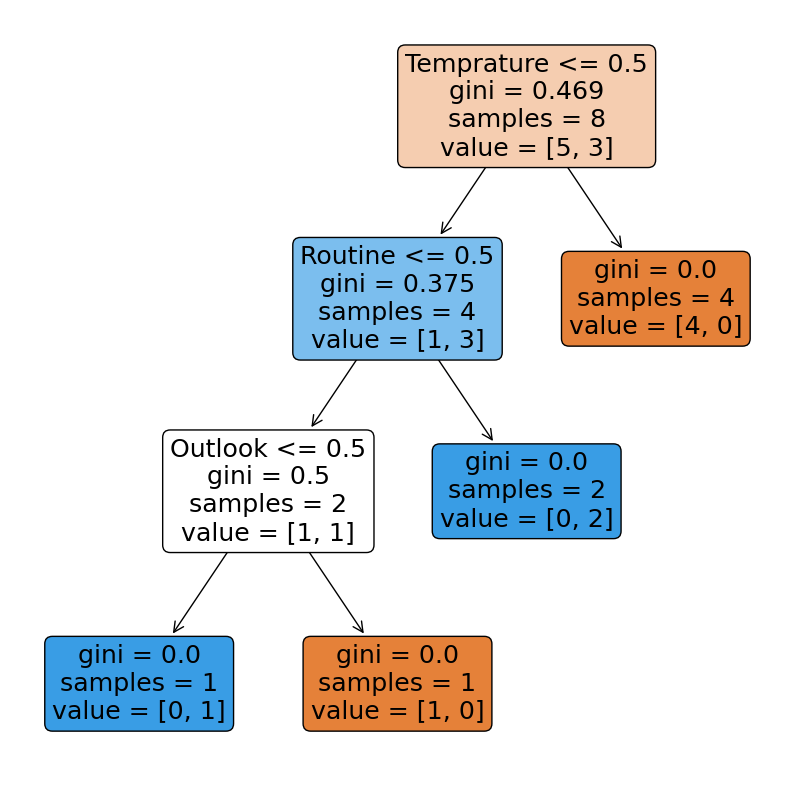

In [48]:
plt.figure(figsize = (10, 10))
tree.plot_tree(clf, feature_names = x.columns, rounded = True, filled = True)